<a href="https://colab.research.google.com/github/julianamu323/Proyectos/blob/main/Afecciones_cardiacas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
import pandas as pd

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
datos = pd.read_csv('/content/drive/MyDrive/Proyectos/Datos/heart_attack_youth_adult_france.csv',
                   sep = ',',
                   low_memory = False)
datos

,Patient_ID,Age,Sex,Weight_kg,Height_cm,BMI,Blood_Pressure_Systolic,Blood_Pressure_Diastolic,Cholesterol_Level,Smoking_Status,...,Exercise_Induced_Pain,Heart_Attack,Age_Group,Region,Air_Pollution_Level,Income_Level,Education_Level,Health_Insurance,Regular_Checkups,Medication_Adherence
0,1,56,Male,118.4,184,35.4,96,94,204.3,Ex-Smoker,...,No,No,Adult,Central,67,Medium,College,Yes,Occasionally,Yes
1,2,46,Male,50.7,164,32.6,114,65,279.4,Non-Smoker,...,No,Yes,Adult,North,16,Low,High School,Yes,Occasionally,Yes
2,3,32,Male,118.0,179,39.8,98,118,291.4,Current Smoker,...,No,No,Adult,South,32,Medium,College,Yes,Frequently,Yes
3,4,60,Male,96.8,161,23.7,108,101,273.3,Non-Smoker,...,No,No,Youth,East,86,Low,College,Yes,Occasionally,Yes
4,5,25,Male,53.9,169,24.4,141,73,290.8,Ex-Smoker,...,No,No,Youth,South,15,Low,High School,Yes,Occasionally,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
266781,266782,33,Male,108.3,160,35.9,121,102,152.7,Ex-Smoker,...,No,Yes,Youth,North,16,High,High School,Yes,Occasionally,Yes
266782,266783,33,Female,75.1,186,19.8,164,119,201.8,Non-Smoker,...,No,Yes,Youth,South,5,Low,College,Yes,Occasionally,No
266783,266784,27,Female,56.5,198,34.7,159,74,160.9,Non-Smoker,...,No,No,Adult,West,55,Medium,Graduate,Yes,Occasionally,Yes
266784,266785,26,Male,70.2,180,35.8,138,112,270.3,Current Smoker,...,No,No,Adult,Central,38,Low,College,Yes,Rarely,Yes


In [4]:
data = datos.copy()

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 266786 entries, 0 to 266785
Data columns (total 27 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Patient_ID                266786 non-null  int64  
 1   Age                       266786 non-null  int64  
 2   Sex                       266786 non-null  object 
 3   Weight_kg                 266786 non-null  float64
 4   Height_cm                 266786 non-null  int64  
 5   BMI                       266786 non-null  float64
 6   Blood_Pressure_Systolic   266786 non-null  int64  
 7   Blood_Pressure_Diastolic  266786 non-null  int64  
 8   Cholesterol_Level         266786 non-null  float64
 9   Smoking_Status            266786 non-null  object 
 10  Alcohol_Consumption       266786 non-null  int64  
 11  Physical_Activity_Hours   266786 non-null  float64
 12  Diabetes                  266786 non-null  object 
 13  Family_History            266786 non-null  o

De acuerdo a la información de los datos, tenemos 27 variables entre cuantitativas y cualitativas siendo de tipo enteros, float y objetos. Además, no se presentan nulos en cada una de las variables a estudiar.

### **Descripción de las variables.**

Dentro del conjunto de datos podemos encontrar variables de tipo cuantitativo y cualitativo las cuales se describen a continuación:

#### **Variables cuantitativas:**
- **Patient ID:** Identificación del paciente (1 - 10.000).
- **Age:** Edad (18 años - 60 años).
- **Weight_kg:** Peso medido en kilogramos (kg).
- **Height_cm:** Altura medida en centímetros (cm).
- **BMI:** Índice de masa corporal.
- **Blood Pressure Systolic:** Presión Arterial Sistólica (90 - 179).
- **Blood Pressure Diastolic:** Presión Arterial Diastólica (60 - 119).
- **Cholesterol Level:** Nivel de colesterol (150.0 - 300.0).
- **Alcohol Consumption:** Consumo de alcohol (0 - 19).
- **Physical Activity hours:** Horas de actividad física (0.0 - 9.9).
- **Stress level:** Nivel de estrés (1 - 10).
- **Heart rate:** Frecuencia cardiaca.
- **Air Pollution level:** Nivel de contaminación del aire (1 - 100).

#### **Variables cualitativas:**
- **Sex:** Sexo (Female, Male y other).
- **Smoking Status:** Estado de fumador (Ex-Smoker, Non-Smoker y Current-Smoker).
- **Diabetes:** Diabetes (Yes - No).
- **Family History:** Historia familiar (Yes - No).
- **Diet type:** Tipo de dieta (Healthy, Mixed y Unheralthy).
- **Excersice Induced Pain:** Dolor inducido por el ejercicio (Yes - No).
- **Heart attack:** Ataque al corazón (Yes - No).
- **Age group:** Grupo o rango de edad (Adulth - Youth).
- **Region:** Región (norte, sur, centro, oeste y este de Francia).
- **Income level:** Nivel de ingresos (High, Low, Medium).
- **Education level:** Nivel de educación (College, Graduate, High School).
- **Health Insurance:** Seguros de salud (Yes - No).
- **Regular Checkups:** Chequeos regulares (Frequently, Occasionally, Rarely).
- **Medication adherence:** Adherencia a la medicación (Yes - No).

Con el fin de mejorar la comprensión de la base de datos, se opta por nombrar algunas de las variables de estudio:

- **Weight_kg:** Weight.
- **Height_cm:** Height.
- **Blood Pressure Sytolic:** BPS.
- **Blood Pressure Diastolic:** BPD.
- **Cholesterol level:** Cholesterol.
- **Physical Activity Hours:** PAH.
- **Excersice Induced Pain:** EIP.

In [6]:
# Renombramiento de algunas variables.
data.rename(columns={'Weight_kg':'Weight', 'Height_cm':'Height',
                     'Blood_Pressure_Systolic':'BPS',
                     'Blood_Pressure_Diastolic':'BPD',
                     'Cholesterol_Level':'Cholesterol',
                     'Physical_Activity_Hours':'PAH',
                     'Exercise_Induced_Pain':'EIP'}, inplace=True)

# Eliminación de variables que no aportan mayor información.
data = data.drop(columns=['Patient_ID'])

# Eliminación de datos nulos.
data = data.dropna()

# Eliminación de filas repetidas.
data = data.drop_duplicates()

In [7]:
# Información estadística de las variables cuantitativas.
data.describe()

,Age,Weight,Height,BMI,BPS,BPD,Cholesterol,Alcohol_Consumption,PAH,Stress_Level,Heart_Rate,Air_Pollution_Level
count,266786.000000,266786.000000,266786.000000,266786.000000,266786.000000,266786.000000,266786.000000,266786.000000,266786.000000,266786.000000,266786.000000,266786.000000
mean,39.012842,85.030971,174.469504,29.239231,134.528686,89.458386,224.816570,9.498085,7.497130,5.491105,84.506342,50.497642
std,12.399825,20.185945,14.448139,6.199761,25.980116,17.326668,43.292459,5.768155,4.334888,2.870952,20.210596,28.871217
min,18.000000,50.000000,150.000000,18.500000,90.000000,60.000000,150.000000,0.000000,0.000000,1.000000,50.000000,1.000000
25%,28.000000,67.600000,162.000000,23.900000,112.000000,74.000000,187.200000,4.000000,3.700000,3.000000,67.000000,25.000000
50%,39.000000,85.000000,174.000000,29.200000,134.000000,89.000000,224.800000,9.000000,7.500000,5.000000,84.000000,51.000000
75%,50.000000,102.500000,187.000000,34.600000,157.000000,104.000000,262.200000,15.000000,11.300000,8.000000,102.000000,76.000000
max,60.000000,120.000000,199.000000,40.000000,179.000000,119.000000,300.000000,19.000000,15.000000,10.000000,119.000000,100.000000


In [8]:
# Correlación entre los datos.
corr = data.corr(numeric_only=True)
corr

,Age,Weight,Height,BMI,BPS,BPD,Cholesterol,Alcohol_Consumption,PAH,Stress_Level,Heart_Rate,Air_Pollution_Level
Age,1.000000,0.000108,-0.003760,0.001154,0.000985,-0.000881,0.003709,-0.001129,-0.001626,-0.001105,-0.001452,-0.002021
Weight,0.000108,1.000000,-0.000915,0.000653,0.002798,0.001410,0.001014,-0.002391,-0.001862,-0.001234,-0.001277,-0.001949
Height,-0.003760,-0.000915,1.000000,-0.001774,0.003153,-0.004675,-0.000163,-0.001399,0.000442,0.000283,0.002222,-0.001423
BMI,0.001154,0.000653,-0.001774,1.000000,-0.000051,-0.000929,-0.000079,0.000498,0.001044,0.000224,0.000999,0.001719
BPS,0.000985,0.002798,0.003153,-0.000051,1.000000,-0.000207,-0.000429,-0.005487,-0.002481,0.002151,0.002859,-0.004027
BPD,-0.000881,0.001410,-0.004675,-0.000929,-0.000207,1.000000,-0.000222,-0.001718,0.002983,-0.001440,-0.003665,0.001210
Cholesterol,0.003709,0.001014,-0.000163,-0.000079,-0.000429,-0.000222,1.000000,-0.001674,0.002450,0.000686,-0.001387,-0.001573
Alcohol_Consumption,-0.001129,-0.002391,-0.001399,0.000498,-0.005487,-0.001718,-0.001674,1.000000,-0.001364,-0.000981,0.000878,-0.003401
PAH,-0.001626,-0.001862,0.000442,0.001044,-0.002481,0.002983,0.002450,-0.001364,1.000000,0.003582,0.003835,-0.001409
Stress_Level,-0.001105,-0.001234,0.000283,0.000224,0.002151,-0.001440,0.000686,-0.000981,0.003582,1.000000,0.001054,-0.000913


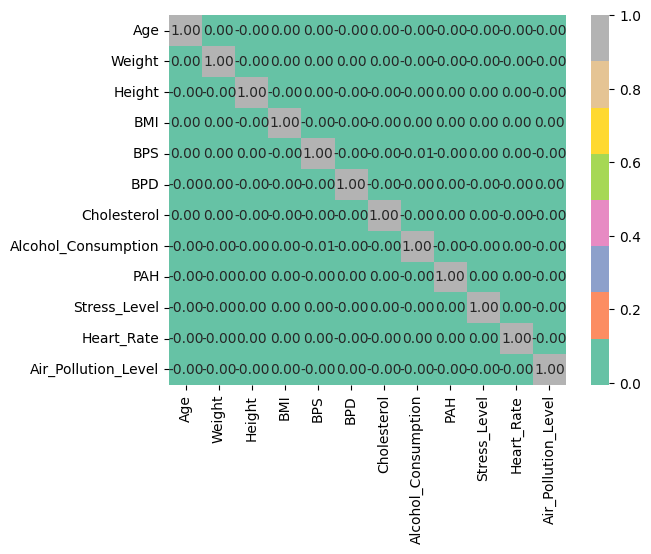

In [9]:
# Graficamente.
sns.heatmap(corr, cmap='Set2', annot = True, fmt = '.2f')
plt.show()

Según los resultados anteriores se observa la baja correlación que existe entre las variables por pares.

## **Preguntas objetivo.**

1. ¿Podemos predecir infartos con datos sobre salud y estilo de vida?
2. ¿Existen grupos de personas con perfiles de riesgo similares?
3. ¿La contaminación atmosférica es un factor determinante para aumenta las tasas de infartos?
4. ¿Los cambios en el IMC (Índice de masa corporal) y la actividad física pueden influir en los riesgos?

# **Análisis Univariado para variables cualitativas.**

**Diagramas de barras.**

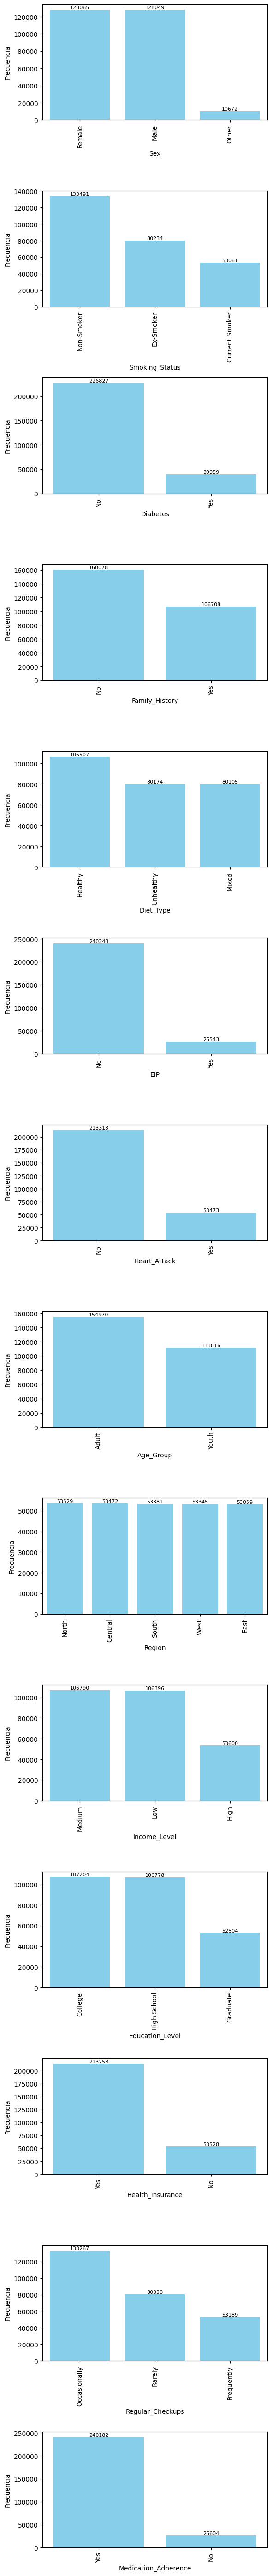

In [30]:
# Etiquetas de las variables cualitativas.

columns = ['Sex', 'Smoking_Status', 'Diabetes', 'Family_History', 'Diet_Type', 'EIP',
       'Heart_Attack', 'Age_Group', 'Region','Income_Level', 'Education_Level',
       'Health_Insurance', 'Regular_Checkups', 'Medication_Adherence']

# Gráfico.
fig, axs = plt.subplots(len(columns), 1, figsize = (6, len(columns)*4))

for i, col in enumerate(columns):
  data[col].value_counts().plot(kind = 'bar', ax = axs[i], color = 'skyblue')
  bars = axs[i].bar(data[col].value_counts().index, data[col].value_counts().values, color = 'skyblue')
  axs[i].set_ylabel('Frecuencia')

  # Etiquetas sobre las barras
  for bar in bars:
        yval = bar.get_height()
        axs[i].text(bar.get_x() + bar.get_width()/2, yval, str(yval), ha='center', va='bottom', fontsize=8)

plt.tight_layout()
plt.show()

De los diagramas de barras presentados anteriormente podemos indicar que los datos presetados son de 128.065 mujeres, 128.049 hombres y 10.672 de otros sexos, siendo 154.970 de personas adultas y 111.816 son personas jóvenes. De los cuales, 133.491 son no fumadores, 80.234 fueron fumadores y 53.061 son fumadores recurrentes. 213.258 personas cuentan con un seguro médico y 53.528 no. También, 226.827 no presentan diabetes, pero 39.959 sí. En su historia familiar, se puede decir que 160.078 indican que dentro de su familia no han presentado afecciones cardíacas y 106.708 indican lo contrario. Del total general, 106.507 personas llevan una dieta saludable, 80.174 no saludable y 80.105 llevan una dieta entre saludable y no saludable. Respecto al dolor inducido por el ejercicio (EIP), 240.243 personas indicaron que no presentan ningún dolor al realizar actividad física, mientras que 26.543 personas indicaron lo contrario. También, 213.313 personas respondieron que no han presentado ataques cardíacos y 53.473 sí han sufrido al menos uno. Referente a las regiones norte, sur, centro, oeste y este de Francia, se observa que están distribuidos de manera uniforme. Por otro lado, los niveles de ingresos están distribuidos en 106.790 con ingresos medios, 106.396 ingresos bajos y 53.600 con ingresos altos. Respecto al nivel educativo, observamos que 107.204 personas tienen un nivel educativo universitario, 106.778 tienen bachillerato y 52.804 de posgrado. De los pacientes analizados, 133.267 ocasionalmente realizan chequeos médicos, 80.330 rara vez van al médico y 53.189 frecuentemente realizan este procedimiento. Finalmente, 240.182 personas cuentan con el uso de un medicamento, mientras que 26.604 no.

# **Análisis Univariado para variables cualitativas.**

**Histogramas.**

In [76]:
columns2 = ['Age', 'Weight', 'Height', 'BMI', 'BPS', 'BPD', 'Cholesterol',
            'Alcohol_Consumption', 'PAH', 'Stress_Level', 'Heart_Rate', 'Air_Pollution_Level']

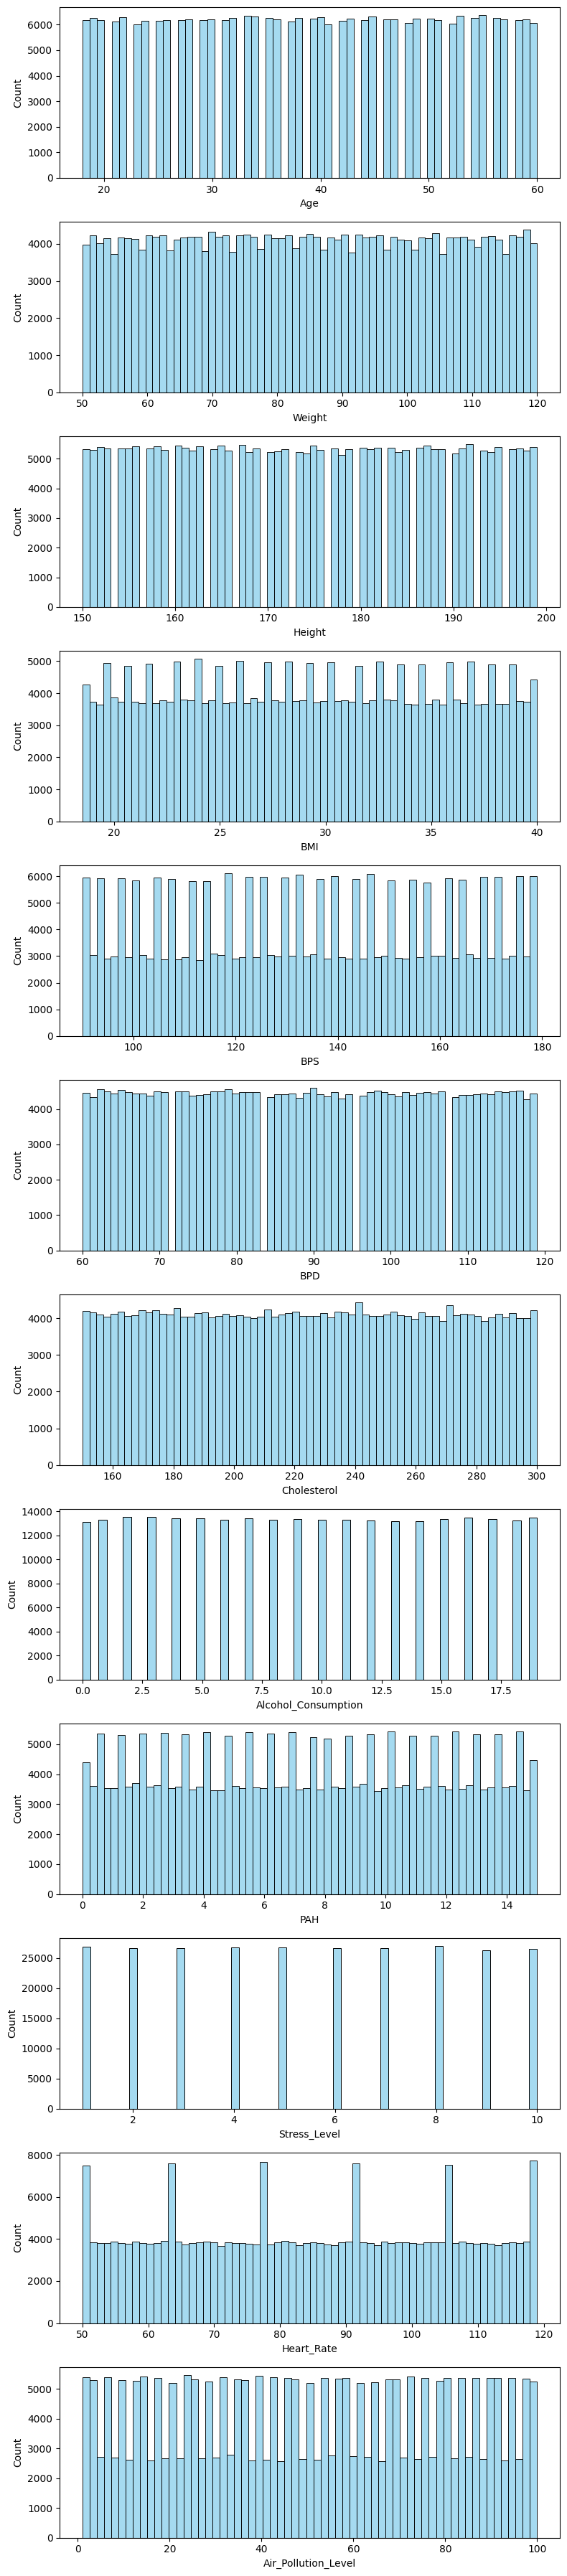

In [78]:
fig, axs = plt.subplots(len(columns2), 1, figsize=(8, len(columns2)*3))

for i, col in enumerate(columns2):
  sns.histplot(x = data[col], color = 'skyblue', ax = axs[i])

plt.tight_layout()
plt.show()

**Boxplot.**

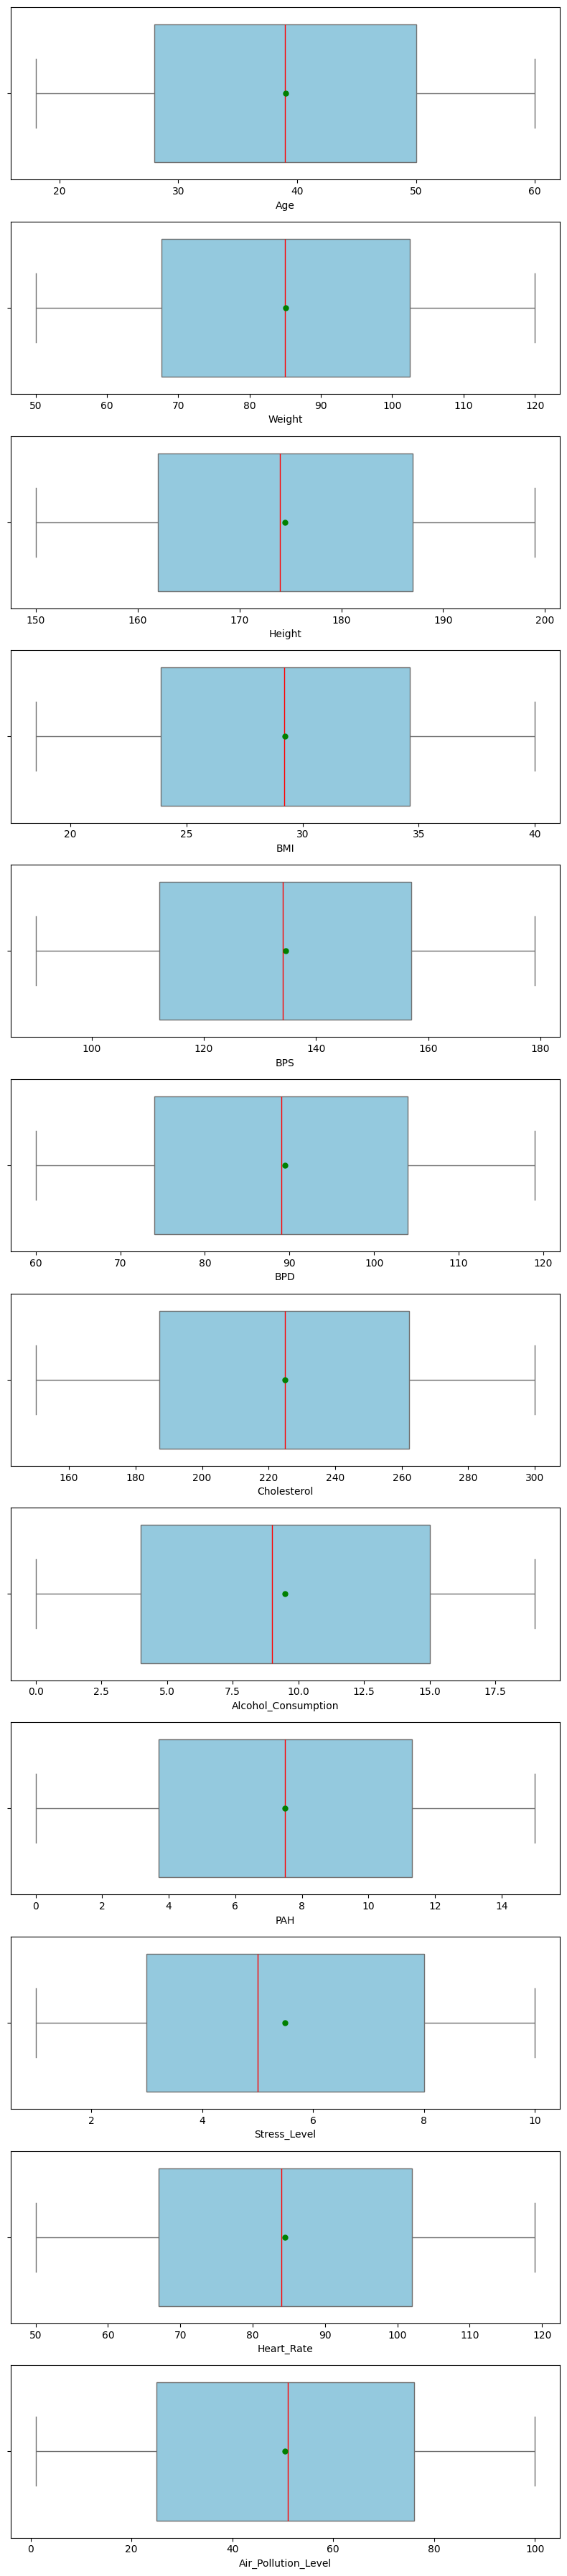

In [77]:
fig, axs = plt.subplots(len(columns2), 1, figsize=(8, len(columns2)*3))

for i, col in enumerate(columns2):
  sns.boxplot(x = data[col], color = 'skyblue', ax = axs[i], showmeans=True,
              medianprops={ "color": "red", "linewidth": 1},
              meanprops={"marker": "o", "markerfacecolor": "green",
                         "markeredgecolor": "green", "markersize": 5})
plt.tight_layout()
plt.show()

De acuerdo a los boxplot presentados anteriormente, podemos observar que para ninguna de las variables cuantitativas se están presentando datos atípicos, esto debido a la naturaleza de la base de datos. En este gráfico encontramos la mediana señalada como una línea en color rojo y la media identificada con un punto verde.

# **Bibliografía.**

**Notas:**
- [Regresión Logística](https://aws.amazon.com/es/what-is/logistic-regression/#:~:text=La%20regresi%C3%B3n%20log%C3%ADstica%20es%20una,factores%20bas%C3%A1ndose%20en%20el%20otro.)
- [Cluster analysis](https://en.wikipedia.org/wiki/Cluster_analysis)
- [Cluster analysis](https://www.spotfire.com/glossary/what-is-cluster-analysis#:~:text=Cluster%20analysis%20is%20a%20data,is%20an%20unsupervised%20learning%20method.)
- [Datos](https://www.kaggle.com/datasets/ankushpanday1/heart-attack-in-youth-vs-adult-in-france)
- [Ideas](https://www.kaggle.com/datasets/ankushpanday1/heart-attack-in-youth-vs-adult-in-germany/code)